# demo_curvlens

This notebook shows how to generate a lensed CMB temperature map using the curvedskylensing module

In [11]:
import lensit as li
import healpy as hp
from lensit.curvedskylensing import lenscurv
%matplotlib inline

In [12]:
# parameters which impact of the accuracy of the result (and the execution time):

lmax = 2048  # desired lmax of the lensed field.
dlmax = 1024  # lmax of the unlensed fields is lmax + dlmax.  (some buffer is required for accurate lensing at lmax)
nside_lens = 2048 # The lensed tlm's are computed with healpy map2alm from a lensed map at resolution 'nside_lens'
facres = -1 # The lensed map of resolution is interpolated from a default high-res grid with about 0.7 amin-resolution
            # The resolution is changed by 2 ** facres is this is set.
    
# lmax = 4096
# lmax=1024
# nside_lens=4096
# facres=0 
# is a choice of parameters that gives an lensed TT spectrum 1% accurate down to 4096.

In [13]:
# We first generate an unlensed temperature and lensing potential. 
# Here for simplicity we use healpy synalm, neglecting correlations between T and E.
cl_unl, cl_len = li.get_fidcls()
tlm_unl = hp.synalm(cl_unl['tt'], lmax=lmax + dlmax)
plm = hp.synalm(cl_unl['pp'], lmax=lmax + dlmax)

# We then transform the lensing potential into spin-1 deflection field, and deflect the temperature map.
dlm = hp.almxfl(plm, np.sqrt(np.arange(lmax + 1, dtype=float) * np.arange(1, lmax + 2)))
tlm_len  = lenscurv.lens_tlm(tlm_unl, dlm, nside=nside_lens, lmaxout=lmax, facres=facres)
# NB: this line is equivalent to
#    tmap_len  =  lencurv.tlm2lensmap(nside_lens, tlm_unl, dlm)
#    tlm_len = hp.map2alm(tmap_len,lmax=lmax,iter=0)


     [00:00:47]  (total [00:00:47]) healpy Spin 1 transform for displacement (full 2048 map)  lensit.curvedskylensing.lenscurv 
BAND 0 in 16 :
input t1,t2 -0.320 6.033 in degrees
North 19.959 and South 19.909 buffers in amin
cell (theta,phi) in amin (1.996,1.109)
BAND 1 in 16 :
input t1,t2 5.214 11.659 in degrees
North 20.140 and South 20.246 buffers in amin
cell (theta,phi) in amin (2.025,1.066)
BAND 2 in 16 :
input t1,t2 10.814 17.338 in degrees
North 20.496 and South 20.409 buffers in amin
cell (theta,phi) in amin (2.050,0.786)
BAND 3 in 16 :
input t1,t2 16.456 22.928 in degrees
North 20.332 and South 20.252 buffers in amin
cell (theta,phi) in amin (2.033,1.027)
BAND 4 in 16 :
input t1,t2 22.061 28.536 in degrees
North 20.294 and South 20.328 buffers in amin
cell (theta,phi) in amin (2.034,1.260)
BAND 5 in 16 :
input t1,t2 27.654 34.197 in degrees
North 20.408 and South 20.380 buffers in amin
cell (theta,phi) in amin (2.055,1.482)
BAND 6 in 16 :
input t1,t2 33.328 39.805 in degrees


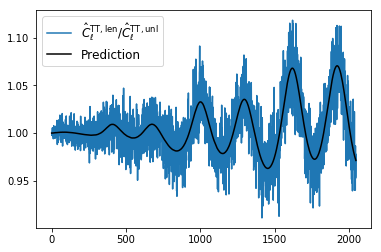

In [17]:
# Plot unlensed vs lensed spectrum.
ell = np.arange(1, lmax + 1)
pl.plot(ell, hp.alm2cl(tlm_len)[ell] /hp.alm2cl(tlm_unl)[ell], 
        label=r'$\hat C_\ell^{\rm TT, len}/\hat C_\ell^{\rm TT, unl}$')
pl.plot(cl_len['tt'][ell] /cl_unl['tt'][ell], c='k', label='Prediction')
pl.legend(fontsize=12)